# Regression
- Fuel Consumption : 100km에 소비하는 양
- Fuel Consumption Comb : City/Hwy = 55/45 비율로 섞음
- mpg * 0.425 = KM/L (연비)
- 의문
    1. 여러 변수와 co2 배출량 사이의 관계
    2. co2 배출에 가장 큰 영향을 끼치는 변수
    3. city와 hwy에 따라 배출량이 다를까

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('../data/CO2 Emissions_Canada.csv')
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
corr_matrix = data.corr()
corr_matrix['CO2 Emissions(g/km)'].sort_values(ascending=False)

CO2 Emissions(g/km)                 1.000000
Fuel Consumption City (L/100 km)    0.919592
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption Hwy (L/100 km)     0.883536
Engine Size(L)                      0.851145
Cylinders                           0.832644
Fuel Consumption Comb (mpg)        -0.907426
Name: CO2 Emissions(g/km), dtype: float64

In [5]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
data_reg = data.drop(columns=['Make','Model'])
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle Class                     7385 non-null   object 
 1   Engine Size(L)                    7385 non-null   float64
 2   Cylinders                         7385 non-null   int64  
 3   Transmission                      7385 non-null   object 
 4   Fuel Type                         7385 non-null   object 
 5   Fuel Consumption City (L/100 km)  7385 non-null   float64
 6   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 9   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 577.1+ KB


In [7]:
data_with_dummies = data_reg.copy()

col_to_1hot = ['Vehicle Class','Transmission','Fuel Type','Cylinders']
prfix_1hot = ['V-Cls', 'Trans', 'Fl-T','Cyl']

for col, pfx in zip(col_to_1hot, prfix_1hot):
    fuel_1hot = pd.get_dummies(data_reg[col], prefix=pfx, drop_first=True)
    data_with_dummies = data_with_dummies.join(fuel_1hot)

In [8]:
data_with_dummies.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),...,Fl-T_N,Fl-T_X,Fl-T_Z,Cyl_4,Cyl_5,Cyl_6,Cyl_8,Cyl_10,Cyl_12,Cyl_16
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,...,0,0,1,1,0,0,0,0,0,0
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,...,0,0,1,1,0,0,0,0,0,0
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,...,0,0,1,1,0,0,0,0,0,0
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,...,0,0,1,0,0,1,0,0,0,0
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,...,0,0,1,0,0,1,0,0,0,0


In [9]:
col_to_drop = col_to_1hot + ['CO2 Emissions(g/km)']
labels = data_with_dummies['CO2 Emissions(g/km)']
final_data = data_with_dummies.drop(col_to_drop, axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Fuel Consumption City (L/100 km)  7385 non-null   float64
 2   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 3   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 4   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 5   V-Cls_FULL-SIZE                   7385 non-null   uint8  
 6   V-Cls_MID-SIZE                    7385 non-null   uint8  
 7   V-Cls_MINICOMPACT                 7385 non-null   uint8  
 8   V-Cls_MINIVAN                     7385 non-null   uint8  
 9   V-Cls_PICKUP TRUCK - SMALL        7385 non-null   uint8  
 10  V-Cls_PICKUP TRUCK - STANDARD     7385 non-null   uint8  
 11  V-Cls_SPECIAL PURPOSE VEHICLE     7385 non-null   uint8  
 12  V-Cls_

## Regression

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
X_train, X_test, y_train, y_test = train_test_split(final_data, labels, test_size=0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred_tr = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  4.737443359066909
RMSE of Test Data :  4.698992548166578


In [12]:
lin_reg.score(X_test,y_test)

0.9931729724310766

In [13]:
lin_reg.score(X_train,y_train)

0.993532796370605

## 모델평가 - RMSE 

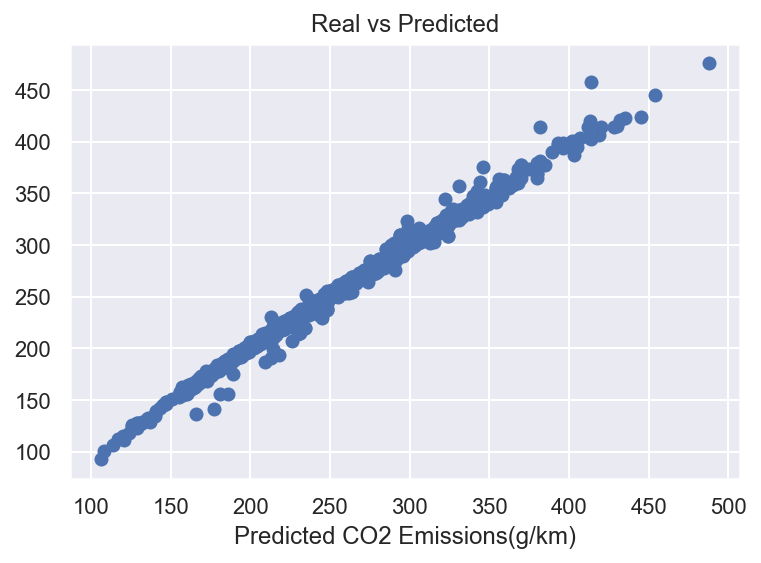

In [14]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual CO2 Emissions(g/km)')
plt.xlabel('Predicted CO2 Emissions(g/km)')
plt.title('Real vs Predicted')
plt.show()

In [15]:
final_data2 = final_data.drop(['Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','Fuel Consumption City (L/100 km)'], axis=1)
final_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Engine Size(L)                  7385 non-null   float64
 1   V-Cls_FULL-SIZE                 7385 non-null   uint8  
 2   V-Cls_MID-SIZE                  7385 non-null   uint8  
 3   V-Cls_MINICOMPACT               7385 non-null   uint8  
 4   V-Cls_MINIVAN                   7385 non-null   uint8  
 5   V-Cls_PICKUP TRUCK - SMALL      7385 non-null   uint8  
 6   V-Cls_PICKUP TRUCK - STANDARD   7385 non-null   uint8  
 7   V-Cls_SPECIAL PURPOSE VEHICLE   7385 non-null   uint8  
 8   V-Cls_STATION WAGON - MID-SIZE  7385 non-null   uint8  
 9   V-Cls_STATION WAGON - SMALL     7385 non-null   uint8  
 10  V-Cls_SUBCOMPACT                7385 non-null   uint8  
 11  V-Cls_SUV - SMALL               7385 non-null   uint8  
 12  V-Cls_SUV - STANDARD            73

In [16]:
X_train, X_test, y_train, y_test = train_test_split(final_data2, labels, test_size=0.2, random_state=15)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train, y_train)

pred_tr = lin_reg2.predict(X_train)
pred_test = lin_reg2.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train :', round(rmse_tr,2) , ', Test :', round(rmse_test,2), '/ Score of Train:',round(lin_reg2.score(X_train,y_train),4), ', Score of Test:', round(lin_reg2.score(X_test,y_test),4),)


RMSE of Train : 22.2 , Test : 22.86 / Score of Train: 0.8555 , Score of Test: 0.8492


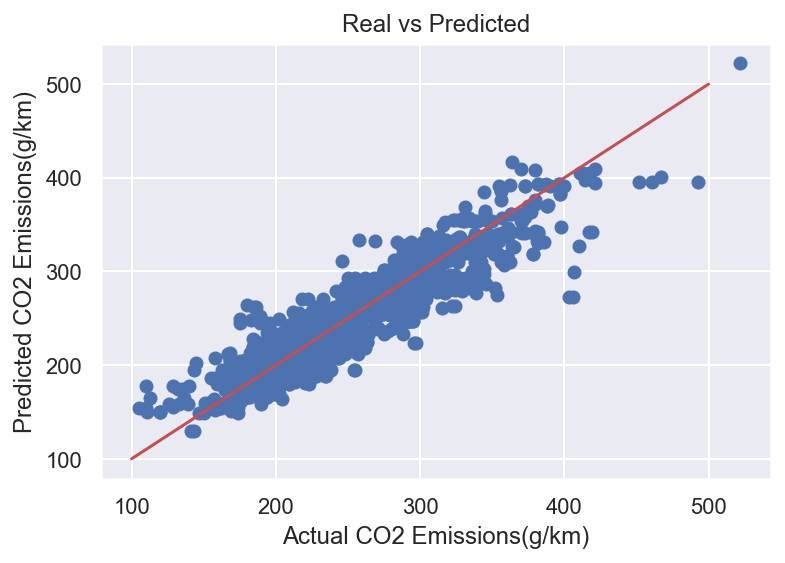

In [17]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual CO2 Emissions(g/km)')
plt.ylabel('Predicted CO2 Emissions(g/km)')
plt.title('Real vs Predicted')

x = np.linspace(100,500)
plt.plot(x, x, 'r')
plt.show()

## OLS

In [18]:
import statsmodels.api as sm

# 상수항 추가
final_data_c = sm.add_constant(final_data2, has_constant='add')

multi_model = sm.OLS(labels, final_data_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.855
Model:                             OLS   Adj. R-squared:                  0.854
Method:                  Least Squares   F-statistic:                     813.0
Date:                 Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                         18:29:49   Log-Likelihood:                -33410.
No. Observations:                 7385   AIC:                         6.693e+04
Df Residuals:                     7331   BIC:                         6.730e+04
Df Model:                           53                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

## 일부 데이터를 빼서 다시 OLS

In [19]:
high_p = ['V-Cls_MID-SIZE', 'Trans_AM5', 'Fl-T_X', 'Trans_AV']

data_ols = final_data2.drop(columns=high_p)
    
# 상수항 추가
final_data_c = sm.add_constant(data_ols, has_constant='add')

multi_model = sm.OLS(labels, final_data_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.855
Model:                             OLS   Adj. R-squared:                  0.854
Method:                  Least Squares   F-statistic:                     879.6
Date:                 Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                         18:29:49   Log-Likelihood:                -33410.
No. Observations:                 7385   AIC:                         6.692e+04
Df Residuals:                     7335   BIC:                         6.727e+04
Df Model:                           49                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## KN regressor

In [21]:
X_train, X_test, y_train, y_test = train_test_split(final_data2, labels, test_size=0.2, random_state=15)

kn_reg = KNeighborsRegressor()
kn_reg.fit(X_train, y_train)

kn_pred_tr = kn_reg.predict(X_train)
kn_pred_test = kn_reg.predict(X_test)

kn_rmse_tr = (np.sqrt(mean_squared_error(y_train, kn_pred_tr)))
kn_rmse_test = (np.sqrt(mean_squared_error(y_test, kn_pred_test)))

print('RMSE of Train :', round(kn_rmse_tr,2) , ', Test :', round(kn_rmse_test,2), '/ Score of Train:',round(kn_reg.score(X_train,y_train),4), ', Score of Test:', round(kn_reg.score(X_test,y_test),4),)


RMSE of Train : 15.06 , Test : 17.97 / Score of Train: 0.9335 , Score of Test: 0.9068


## Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
X_train, X_test, y_train, y_test = train_test_split(final_data2, labels, test_size=0.2, random_state=15)

tree_reg = DecisionTreeRegressor(random_state=8)
tree_reg.fit(X_train, y_train)

tree_pred_tr = tree_reg.predict(X_train)
tree_pred_test = tree_reg.predict(X_test)

tree_rmse_tr = (np.sqrt(mean_squared_error(y_train, tree_pred_tr)))
tree_rmse_test = (np.sqrt(mean_squared_error(y_test, tree_pred_test)))

print('RMSE of Train :', round(tree_rmse_tr,2) , ', Test :', round(tree_rmse_test,2), '/ Score of Train:',round(tree_reg.score(X_train,y_train),4), ', Score of Test:', round(tree_reg.score(X_test,y_test),4),)

RMSE of Train : 12.58 , Test : 15.65 / Score of Train: 0.9536 , Score of Test: 0.9293


### randomforest

In [24]:
forest_reg_trans = RandomForestRegressor(n_estimators=100, random_state=13)
forest_reg_trans.fit(X_train, y_train)

forest_pred_tr = forest_reg_trans.predict(X_train)
forest_pred_test = forest_reg_trans.predict(X_test)

forest_rmse_tr = (np.sqrt(mean_squared_error(y_train, forest_pred_tr)))
forest_rmse_test = (np.sqrt(mean_squared_error(y_test, forest_pred_test)))

print('RMSE of Train :', round(forest_rmse_tr,2) , ', Test :', round(forest_rmse_test,2), '/ Score of Train:',round(forest_reg_trans.score(X_train,y_train),4), ', Score of Test:', round(forest_reg_trans.score(X_test,y_test),4),)

RMSE of Train : 12.77 , Test : 15.37 / Score of Train: 0.9522 , Score of Test: 0.9318
